# Analiza - sprawdzenie bardzo prostej strategii opartej jedynie na dwóch formacjach świecowych + "zasada 11/20"

<h3>
<center>
Robert Nowotniak <rnowotniak@gmail.com><br/>
w oparciu o metodykę Fraktal Trader Moduł 1, formacje świecowe
</center>
</h3>

* [Eksperyment 1) Analiza młotków - EURUSD 1h](#eksperyment1)

* [Eksperyment 2) Spadające gwiazdy - Dow Jones 1h](#eksperyment2)

* [Eksperyment 3) Analiza zbiorcza dla wszystkich walorów - Młotki](#eksperyment3)

* [Eksperyment 3) - Podsumowanie zbiorcze](#eksperyment3summary)
 
* [Eksperyment 4) Analiza zbiorcza dla wszystkich walorów - Spadające gwiazdy](#eksperyment4)

* [Eksperyment 4) - Podsumowanie zbiorcze](#eksperyment4summary)

In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns
import glob, os.path
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
eurusd = pd.read_csv('data/EURUSD60.csv',
                   names=['day', 'hour', 'open', 'high', 'low', 'close', 'volume'], index_col=False)
eurusd['date'] = pd.DatetimeIndex(eurusd.day + ' ' + eurusd.hour)
del eurusd['day']
del eurusd['hour']
eurusd.set_index('date', inplace=True)
eurusd.info()

eurusd.ix['2017-06-23 23:00']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2451 entries, 2017-02-01 21:00:00 to 2017-06-23 23:00:00
Data columns (total 5 columns):
open      2451 non-null float64
high      2451 non-null float64
low       2451 non-null float64
close     2451 non-null float64
volume    2451 non-null int64
dtypes: float64(4), int64(1)
memory usage: 114.9 KB


open         1.11964
high         1.11973
low          1.11914
close        1.11923
volume    1093.00000
Name: 2017-06-23 23:00:00, dtype: float64

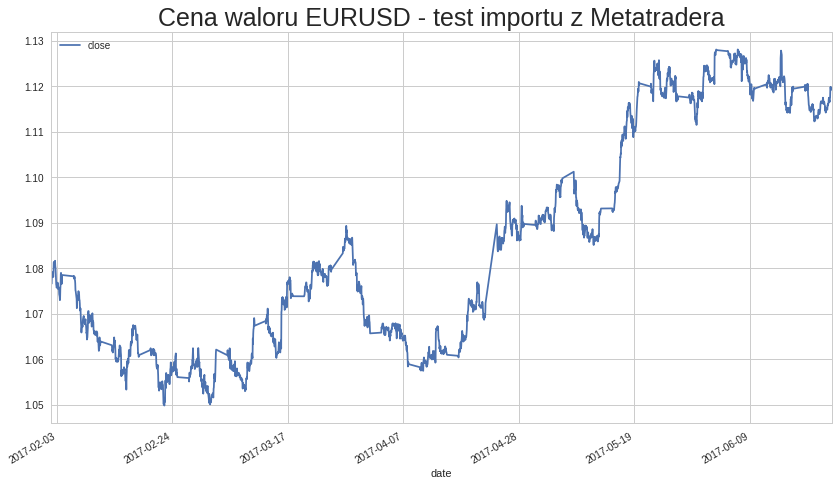

In [3]:
eurusd['close'].plot(legend=True,figsize=(14,8))
plt.title('Cena waloru EURUSD - test importu z Metatradera', fontsize=25)

In [4]:
def ohlc(r):
    return r['open'], r['high'], r['low'], r['close']

## Wczytanie specyfikacji wszystkich instrumentów

Specyfikacja instrumentów wygenerowana w MetaTraderze skryptem MQL allmarketdata.ex4

In [5]:
specs = pd.read_csv('instruments.csv', sep=';', index_col=0)

# XXX - nie da się tego wyciągnąć bezpośrednio ze specyfikacji ??
def setPipSize(x):
    return float(x['Tick Size']) # XXX - uproszczenie, nie jestem pewien, czy to jest prawidłowe
                                 #       ale chyba nie ma znaczenia
    if x['Pr. Mode'] == 'Forex':
        if x['Symbol'].endswith('JPY'):
            return 0.01
        # elif x['Symbol'].endswith('HUF'):  # XXX Hungarian Forint ???
        return 0.0001
    return 1
specs['Pip'] = specs.apply(setPipSize, axis=1)

specs

,Description,Digits,Spread,Swap Long,Swap Short,Swap Type,Stop Level,Lot Size,Lot Min,Lot Step,Tick Value,Tick Size,Trade Allowed,Pr. Mode,Pip
Symbol,,,,,,,,,,,,,,,
AUDCAD,AUSTRALIAN DOLLAR VS CANADIAN DOLLAR,5,32,-0.90,-8.19,points,160,100000,0.01,0.01,2.839511,0.00001,yes,Forex,0.00001
AUDCHF,Australian Dollar vs Swiss Franc,5,36,2.21,-8.89,points,160,100000,0.01,0.01,3.871266,0.00001,yes,Forex,0.00001
AUDJPY,Australian Dollar vs Japanise Yen,3,29,0.76,-8.44,points,99,100000,0.01,0.01,3.370140,0.00100,yes,Forex,0.00100
AUDNZD,Australian Dollar vs New Zealand Dollar,5,41,-4.82,-4.62,points,210,100000,0.01,0.01,2.742852,0.00001,yes,Forex,0.00001
AUDUSD,Australian Dollar vs US Dollar,5,19,-1.07,-3.73,points,50,100000,0.01,0.01,3.756560,0.00001,yes,Forex,0.00001
CADCHF,Canadian Dollar vs Swiss Franc,0,0,-0.14,-5.95,points,180,100000,0.01,0.01,0.000000,0.00001,yes,Forex,0.00001
CADJPY,Canadian Dollar vs Japanise Yen,3,32,-2.47,-4.97,points,100,100000,0.01,0.01,3.370140,0.00100,yes,Forex,0.00100
CHFJPY,Swiss Franc vs Japanise Yen,0,0,-7.32,-2.74,points,120,100000,0.01,0.01,0.000000,0.00100,yes,Forex,0.00100
CHFSGD,Swiss Franc vs Singapore Dollar,0,0,-14.68,-2.28,points,280,100000,0.01,0.01,0.000000,0.00001,yes,Forex,0.00001


### Wczytanie historycznych danych wszystkich walorów do klasy Instrument

In [6]:
class Instrument:
    def __init__(self, name):
        self.name = name
        self.spec = None
        self.results = None
        self.balance = 0  # +/- gain value
        self.stats = {} # PROFIT: ...,  LOSS: ...
        self.success_rate = None
        self.data = pd.read_csv('data/%s60.csv' % name, index_col = False,
                   names=['day', 'hour', 'open', 'high', 'low', 'close', 'volume'])
        self.data['date'] = pd.DatetimeIndex(self.data.day + ' ' + self.data.hour)
        del self.data['day']
        del self.data['hour']
        self.data.set_index('date', inplace = True)
    
    def __str__(self):
        s = self.name
        if self.data is not None:
            s = s + ' ' + str(self.data.shape)
        return s

INSTRUMENTS = {}        
        
for f in glob.glob('data/*60.csv'):
    name = os.path.basename(f).replace('60.csv', '')
    inst = Instrument(name)
    inst.spec = specs.ix[name]
    INSTRUMENTS[name] = inst
 

## Sprawdzenie wybranych walorów

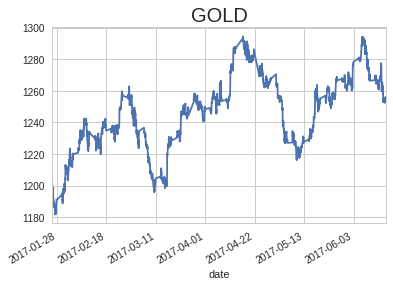

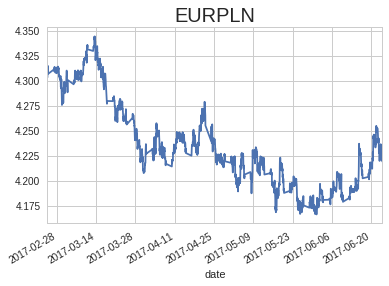

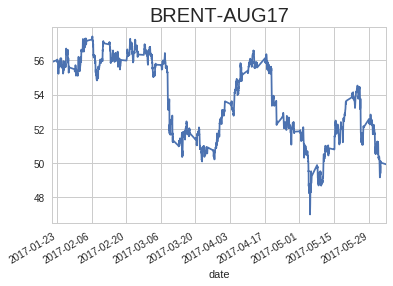

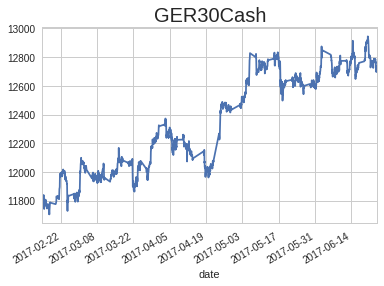

In [7]:
for inst in ['GOLD', 'EURPLN', 'BRENT-AUG17', 'GER30Cash']:
    INSTRUMENTS[inst].data['close'].plot()
    plt.title(inst, fontsize=20)
    plt.show()

## Zasada 11 / 20 - porównywanie rozmiaru świecy z 20 poprzednimi

In [8]:
def zasada1120(inst, t):
    
    BACKSIZE = 20         # XXX Wyciągnąć gdzieś do konfiguracji
    CANDLES_REQUIRED = 11 # XXX
    
    t = pd.Timestamp(t)
    i = inst.data.index.get_loc(t, 'nearest')
    o, h, l, c = ohlc(inst.data.iloc[i])
    size = h - l
   
    j = 1
    smaller_candles = 0
    while j <= BACKSIZE and i - j >= 0 and smaller_candles < CANDLES_REQUIRED:
        o, h, l, c = ohlc(inst.data.iloc[i - j])
        if size > h - l:
            smaller_candles += 1
        j += 1
    if smaller_candles >= CANDLES_REQUIRED:
        return True
    
    return False
    
zasada1120(INSTRUMENTS['US30Cash'], '2017/06/20 22:00')

True

## Sprawdzanie, czy dany sygnał był prawidłowy(czy zarobił) -- B. WAŻNY FRAGMENT
### (ta funkcja docelowo byłaby jednym z głównych elementów pełnego symulatora strategii)

In [9]:
# returns:
#   (PROFIT/LOSS, gain value, nswaps, sp, tp, size)
def sprawdz(inst, t, buysell = 'buy'):
    t = pd.Timestamp(t)
    i = inst.data.index.get_loc(t, 'nearest')
    o, h, l, c = ohlc(inst.data.iloc[i])
    size = h - l
    
    spread = 3 # XXX  US30
    spread = 0.0003 # XXX EURUSD
    spread = float(inst.spec['Spread']) / 10**int(inst.spec['Digits'])  # XXX
    #print(spread)
    PROFIT_TO_RISK = 3  # XXX Wyciagnac do konfiguracji
    
    if buysell == 'buy':
        sl = l - inst.spec['Pip'] # 1 punkt pod formacja
        risk = c - sl + spread # -> mozliwa strata = roznica poziomow + spread
        tp = c + spread + risk * PROFIT_TO_RISK # -> mozliwy zysk = roznica poziomow - spread = risk*PTR
    elif buysell == 'sell':
        sl = h + inst.spec['Pip'] + spread # 1 punkt nad formacja + spread (chyba z zalozenia ze spada szybciej)
        risk = sl - c + spread # mozliwa strata = roznica poziomow + spread
        tp = c - risk * PROFIT_TO_RISK - spread  # -> mozliwy zysk = roznica poziomow - spread = risk*PTR
    else:
        raise Exception('buysell')
    # print(sl, tp)
    
    before_midnght = inst.data.index[i].hour > 12
    nswaps = 0
    while i < inst.data.shape[0] - 1:
        i += 1
        o, h, l, c = ohlc(inst.data.iloc[i])
        
        if before_midnght and inst.data.index[i].hour < 12:
            # print('SWAP')
            nswaps += 1
        before_midnght = inst.data.index[i].hour > 12
        
        result = None
        if (buysell == 'buy' and h >= tp) or (buysell == 'sell' and l <= tp):
            # print(inst.data.index[i])
            result = 'PROFIT'
        if (buysell == 'buy' and l <= sl) or (buysell == 'sell' and h >= sl):
            # print(inst.data.index[i])
            if result == 'PROFIT':
                return 'Unknown'
            result = 'LOSS'
        if result == 'PROFIT':
            return result, PROFIT_TO_RISK * risk, nswaps, sl, tp, size #, zasada1120(inst, t)
        if result == 'LOSS':
            return result, -risk, nswaps, sl, tp, size #, zasada1120(inst, t)

t = '2017/06/22 01:00'
print(sprawdz(INSTRUMENTS['EURUSD'], t))

('LOSS', -0.00033000000000009454, 0, 1.1164399999999999, 1.1177600000000003, 0.00029000000000012349)


## Definicja wybranych formacji świecowych - funkcje wykrywające

In [10]:
def jestMlotek(row):
    o, h, l, c = ohlc(row)
    if c > o and c - o <= 0.4 * (h - l):
        if h - c <= 0.14 * (h - l):
            return True
    if c < o and o - c <= 0.4 * (h - l):
        if h - o <= 0.14 * (h - l):
            return True    
    return False

def jestSpadajacaGwiazda(row):
    o, h, l, c = ohlc(row)
    if c > o and c - o <= 0.4 * (h - l):
        if o - l <= 0.14 * (h - l):
            return True
    if c < o and o - c <= 0.4 * (h - l):
        if c - l <= 0.14 * (h - l):
            return True    
    return False

# ...
# Tutaj dalej docelowo powinny być zaimplementowane inne formacje (przenikania, zasłona ciemnej chmury itp)
# ...

<a id='eksperyment1'></a>
## Eksperyment 1) Analiza młotków - EURUSD 1h

In [12]:
inst = INSTRUMENTS['EURUSD']

stats = {}
balance = 0.
for idx, row in inst.data['2017/01/01':'2017/07/01'].iterrows():
    if jestMlotek(row) and zasada1120(inst,idx):
        res = sprawdz(inst, idx)
        if not res:
            print(idx, ' ', res)
            continue        
        print(idx, ' ', '%6s'%res[0], ' ', end='')
        for _ in res[1:]:
            print('%.5f'%_, ' ', end='')
        print()
        if type(res) == tuple:
            balance += res[1] # XXX tu ewentualnie uwzgledniac swap * nswaps
            if res[0] not in stats:
                stats[res[0]] = 0
            stats[res[0]] += 1
print(balance)
print(stats)
print("Success rate: %.2f%%" % (100.0*stats['PROFIT']/ sum(stats.values())))

2017-02-03 18:00:00     LOSS  -0.00160  0.00000  1.07759  1.08399  0.00158  
2017-02-06 17:00:00     LOSS  -0.00275  1.00000  1.07124  1.08224  0.00268  
2017-02-07 10:00:00     LOSS  -0.00145  0.00000  1.06606  1.07186  0.00226  
2017-02-07 15:00:00     LOSS  -0.00132  0.00000  1.06636  1.07164  0.00140  
2017-02-08 17:00:00     LOSS  -0.00222  0.00000  1.06858  1.07746  0.00217  
2017-02-10 16:00:00     LOSS  -0.00163  1.00000  1.06069  1.06721  0.00167  
2017-02-22 12:00:00     LOSS  -0.00139  0.00000  1.04933  1.05489  0.00164  
2017-02-23 09:00:00     LOSS  -0.00180  0.00000  1.05372  1.06092  0.00224  
2017-02-24 12:00:00     LOSS  -0.00110  0.00000  1.05824  1.06264  0.00112  
2017-02-28 02:00:00   PROFIT  0.00354  0.00000  1.05685  1.06157  0.00164  
2017-03-01 10:00:00     LOSS  -0.00211  0.00000  1.05249  1.06093  0.00202  
2017-03-02 14:00:00     LOSS  -0.00133  0.00000  1.05074  1.05606  0.00144  
2017-03-08 14:00:00     LOSS  -0.00109  0.00000  1.05480  1.05916  0.00132  


<a id='eksperyment2'></a>
## Eksperyment 2) Spadające gwiazdy - Dow Jones 1h

In [13]:
inst = INSTRUMENTS['US30Cash']

balance = 0.
stats = {}
for idx, row in inst.data['2017/01/01':'2017/07/01'].iterrows():
    if jestSpadajacaGwiazda(row) and zasada1120(inst,idx):
        res = sprawdz(inst, idx, 'sell') # XXX <- SELL
        if not res:
            print(idx, ' ', res)
            continue
        print(idx, ' ', '%6s'%res[0], ' ', end='')
        for _ in res[1:]:
            print('%.5f'%_, ' ', end='')
        print()
        if type(res) == tuple:
            balance += res[1] # XXX tu ewentualnie uwzgledniac swap * nswaps
            if res[0] not in stats:
                stats[res[0]] = 0
            stats[res[0]] += 1
print(balance)  
print(stats)
print("Success rate: %.2f%%" % (100.0*stats['PROFIT']/ sum(stats.values())))

2017-02-01 16:00:00   PROFIT  96.33000  1.00000  19965.61000  19837.17000  36.50000  
2017-02-06 17:00:00     LOSS  -36.61000  1.00000  20095.81000  19949.37000  33.00000  
2017-02-06 18:00:00     LOSS  -33.61000  1.00000  20087.81000  19953.37000  30.00000  
2017-02-22 10:00:00     LOSS  -26.61000  0.00000  20752.01000  20645.57000  23.00000  
2017-03-06 22:00:00   PROFIT  106.83000  2.00000  20987.91000  20845.47000  32.50000  
2017-03-07 12:00:00     LOSS  -24.61000  0.00000  20957.31000  20858.87000  19.00000  
2017-03-09 17:00:00   PROFIT  82.83000  0.00000  20903.81000  20793.37000  38.50000  
2017-03-17 20:00:00   PROFIT  94.83000  2.00000  20978.61000  20852.17000  30.20000  
2017-03-17 22:00:00     LOSS  -30.11000  1.00000  20939.61000  20819.17000  28.50000  
2017-03-20 21:00:00     LOSS  -29.61000  1.00000  20933.81000  20815.37000  38.00000  
2017-03-21 15:00:00   PROFIT  114.33000  0.00000  20970.81000  20818.37000  35.00000  
2017-03-23 20:00:00   PROFIT  103.83000  1.000

<a id='eksperyment3'></a>
## Eksperyment 3) Analiza zbiorcza dla wszystkich walorów - Młotki

In [14]:
%%time

for name in INSTRUMENTS:
    print(name)
    inst = INSTRUMENTS[name]
    inst.results = pd.DataFrame( columns = range(7) )

    stats = {}
    balance = 0.
    for idx, row in inst.data['2017/01/01':].iterrows():  # XXX Month
        if jestMlotek(row) and zasada1120(inst,idx): # XXX jestMlotek
            res = sprawdz(inst, idx) # XXX buy/sell
            if not res or type(res) == str:
                continue        
            inst.results = inst.results.append([ (idx,) + res ])
            if type(res) == tuple:
                balance += res[1] # XXX tu ewentualnie uwzgledniac swap * nswaps
                if res[0] not in stats:
                    stats[res[0]] = 0
                stats[res[0]] += 1
    inst.results.columns = ['date', 'PL', 'gv', 'nswaps', 'sl', 'tp', 'size']
    inst.results.set_index('date', inplace=True)
    inst.balance = balance
    inst.stats = stats
    inst.success_rate = 0
    if 'PROFIT' in stats:
        inst.success_rate = stats['PROFIT']/ sum(stats.values())

GBPCAD
AUDCHF
EURRUB
EURPLN
EURSEK
AUDNZD
SUGAR-JUL17
BRENT-AUG17
USDCHF
USDCAD
AUDCAD
SILVER
GOLD
EURAUD
EURNOK
EURHKD
EURUSD
EURCHF
GER30Cash
COCOA-SEP17
EURDKK
POL20Cash
US30Cash
AUDJPY
CADJPY
CPU times: user 39.5 s, sys: 6.81 ms, total: 39.5 s
Wall time: 39.5 s


In [15]:
for iname in sorted(INSTRUMENTS.keys()):
    inst = INSTRUMENTS[iname]
    if inst.results is not None:
        display(HTML('<h3>%s</h3>' % iname))
        display(HTML('<b>Balance: </b> %f &nbsp;&nbsp;&nbsp;&nbsp; <b>Trades:</b>%s' % (inst.balance, inst.stats)))
        display(HTML('<b>Success rate: </b> %.2f%%' % (100. * inst.success_rate)))
        print("One month details:")
        display(inst.results['2017/06/01':])        

One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-07 12:00:00,LOSS,-0.00196,2.0,1.01410,1.02194,0.00184
2017-06-08 15:00:00,LOSS,-0.00175,0.0,1.01746,1.02446,0.00164
2017-06-09 16:00:00,LOSS,-0.00118,0.0,1.01184,1.01656,0.00124
2017-06-12 17:00:00,LOSS,-0.00109,0.0,1.01303,1.01739,0.00143
2017-06-14 12:00:00,LOSS,-0.00099,0.0,1.00014,1.00410,0.00123
2017-06-20 16:00:00,LOSS,-0.00142,0.0,1.00680,1.01248,0.00161
2017-06-22 19:00:00,PROFIT,0.00555,1.0,0.99687,1.00427,0.00155


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 10:00:00,LOSS,-0.00122,0.0,0.71607,0.72095,0.00142
2017-06-05 00:00:00,PROFIT,0.00912,2.0,0.71286,0.72502,0.00280
2017-06-06 05:00:00,PROFIT,0.00384,0.0,0.71849,0.72361,0.00102
2017-06-06 17:00:00,LOSS,-0.00225,0.0,0.72216,0.73116,0.00206
2017-06-09 00:00:00,PROFIT,0.00765,3.0,0.72672,0.73692,0.00283
2017-06-14 17:00:00,LOSS,-0.00115,0.0,0.73562,0.74022,0.00108
2017-06-14 18:00:00,PROFIT,0.00330,1.0,0.73524,0.73964,0.00132
2017-06-14 22:00:00,LOSS,-0.00147,1.0,0.73619,0.74207,0.00163
2017-06-15 05:00:00,LOSS,-0.00120,0.0,0.73868,0.74348,0.00138


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 18:00:00,LOSS,-0.158,1.0,82.072,82.704,0.144
2017-06-06 05:00:00,LOSS,-0.182,0.0,81.890,82.618,0.191
2017-06-06 13:00:00,LOSS,-0.118,0.0,81.915,82.387,0.164
2017-06-07 09:00:00,LOSS,-0.133,0.0,82.420,82.952,0.156
2017-06-15 06:00:00,LOSS,-0.198,0.0,83.273,84.065,0.169
2017-06-20 15:00:00,LOSS,-0.162,0.0,84.591,85.239,0.206
2017-06-20 19:00:00,LOSS,-0.140,1.0,84.345,84.905,0.124
2017-06-21 18:00:00,LOSS,-0.147,0.0,84.100,84.688,0.154


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 16:00:00,LOSS,-0.00110,1.0,1.04641,1.05081,0.00127
2017-06-06 08:00:00,LOSS,-0.00156,0.0,1.04445,1.05069,0.00182
2017-06-08 07:00:00,LOSS,-0.00195,0.0,1.04669,1.05449,0.00163
2017-06-08 10:00:00,LOSS,-0.00140,0.0,1.04643,1.05203,0.00163
2017-06-08 14:00:00,LOSS,-0.00109,0.0,1.04534,1.04970,0.00139
2017-06-12 01:00:00,LOSS,-0.00168,1.0,1.04378,1.05050,0.00126
2017-06-13 01:00:00,LOSS,-0.00131,0.0,1.04652,1.05176,0.00158
2017-06-14 09:00:00,LOSS,-0.00127,0.0,1.04330,1.04838,0.00132
2017-06-16 08:00:00,LOSS,-0.00143,0.0,1.05080,1.05652,0.00111


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-06 14:00:00,LOSS,-0.155,0.0,81.123,81.743,0.211
2017-06-06 15:00:00,LOSS,-0.165,1.0,81.068,81.728,0.184
2017-06-08 13:00:00,LOSS,-0.114,0.0,81.408,81.864,0.147
2017-06-08 14:00:00,LOSS,-0.188,0.0,81.370,82.122,0.173
2017-06-09 00:00:00,PROFIT,0.918,0.0,81.027,82.251,0.385
2017-06-19 16:00:00,LOSS,-0.229,1.0,83.957,84.873,0.221
2017-06-20 09:00:00,LOSS,-0.146,0.0,84.360,84.944,0.124
2017-06-20 15:00:00,LOSS,-0.227,1.0,83.819,84.727,0.231
2017-06-20 17:00:00,LOSS,-0.212,1.0,83.919,84.767,0.193


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-14 17:45:00,LOSS,-34.0,2.0,2046.0,2182.0,22.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 16:00:00,LOSS,-0.00261,0.0,1.51772,1.52816,0.00356
2017-06-05 11:00:00,LOSS,-0.00263,0.0,1.50481,1.51533,0.00382
2017-06-06 12:00:00,LOSS,-0.00158,0.0,1.50189,1.50821,0.00197
2017-06-08 16:00:00,LOSS,-0.00306,0.0,1.48610,1.49834,0.00287
2017-06-08 17:00:00,LOSS,-0.00402,0.0,1.48536,1.50144,0.00380
2017-06-16 03:00:00,LOSS,-0.00161,0.0,1.46782,1.47426,0.00174
2017-06-16 18:00:00,LOSS,-0.00158,0.0,1.46718,1.47350,0.00213
2017-06-20 04:00:00,LOSS,-0.00384,0.0,1.46634,1.48170,0.00368
2017-06-21 00:00:00,PROFIT,0.00627,0.0,1.46709,1.47545,0.00195


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 12:00:00,LOSS,-0.00072,0.0,1.08518,1.08806,0.00082
2017-06-06 12:00:00,LOSS,-0.00112,1.0,1.08431,1.08879,0.00096
2017-06-12 10:00:00,LOSS,-0.00141,0.0,1.08470,1.09034,0.00116
2017-06-14 20:00:00,LOSS,-0.00116,0.0,1.08900,1.09364,0.00142
2017-06-15 13:00:00,LOSS,-0.00122,0.0,1.08665,1.09153,0.00104
2017-06-16 18:00:00,LOSS,-0.00138,1.0,1.08893,1.09445,0.00123
2017-06-20 10:00:00,LOSS,-0.00191,0.0,1.08554,1.09318,0.00217
2017-06-21 20:00:00,LOSS,-0.00096,1.0,1.08509,1.08893,0.00078
2017-06-22 12:00:00,LOSS,-0.00076,0.0,1.08636,1.08940,0.00052


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 00:00:00,LOSS,-0.00327,1.0,7.43594,7.44902,0.00111
2017-06-02 00:00:00,LOSS,-0.00345,0.0,7.43589,7.44969,0.00159
2017-06-02 11:00:00,LOSS,-0.00422,3.0,7.43563,7.45251,0.00254
2017-06-05 19:00:00,LOSS,-0.00267,0.0,7.43868,7.44936,0.00056
2017-06-07 00:00:00,LOSS,-0.00380,3.0,7.43450,7.44970,0.00178
2017-06-07 01:00:00,LOSS,-0.00305,1.0,7.43519,7.44739,0.00099
2017-06-08 00:00:00,LOSS,-0.00369,2.0,7.43470,7.44946,0.00159
2017-06-08 03:00:00,LOSS,-0.00304,0.0,7.43541,7.44757,0.00090
2017-06-08 23:00:00,LOSS,-0.00293,1.0,7.43601,7.44773,0.00078


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 03:00:00,LOSS,-0.00808,0.0,4.18732,4.21964,0.00412
2017-06-02 18:00:00,LOSS,-0.00882,0.0,4.17997,4.21525,0.00466
2017-06-05 01:00:00,LOSS,-0.00973,0.0,4.17567,4.21459,0.00567
2017-06-05 02:00:00,LOSS,-0.00906,0.0,4.17724,4.21348,0.00480
2017-06-05 05:00:00,LOSS,-0.00875,0.0,4.17735,4.21235,0.00499
2017-06-05 06:00:00,LOSS,-0.00872,0.0,4.17728,4.21216,0.00466
2017-06-05 23:00:00,LOSS,-0.00813,1.0,4.18002,4.21254,0.00422
2017-06-07 00:00:00,LOSS,-0.00823,0.0,4.18677,4.21969,0.00417
2017-06-07 01:00:00,LOSS,-0.00826,0.0,4.18674,4.21978,0.00430


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 15:00:00,LOSS,-0.6339,1.0,63.0484,65.5840,0.3670
2017-06-02 16:00:00,LOSS,-0.6946,1.0,63.3637,66.1421,0.2666
2017-06-06 09:00:00,LOSS,-0.7142,1.0,63.2826,66.1394,0.3101
2017-06-14 16:00:00,PROFIT,1.7034,4.0,63.8312,66.1024,0.1433
2017-06-19 15:00:00,LOSS,-0.6197,0.0,64.8715,67.3503,0.1859


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 16:00:00,LOSS,-0.00229,1.0,1.12540,1.13456,0.00226
2017-06-05 14:00:00,LOSS,-0.00122,0.0,1.12357,1.12845,0.00108
2017-06-08 17:00:00,LOSS,-0.00273,1.0,1.11949,1.13041,0.00280
2017-06-12 17:00:00,LOSS,-0.00129,1.0,1.11911,1.12427,0.00185
2017-06-14 20:00:00,LOSS,-0.00089,0.0,1.12622,1.12978,0.00115
2017-06-15 19:00:00,LOSS,-0.00110,1.0,1.11384,1.11824,0.00121
2017-06-16 16:00:00,LOSS,-0.00131,1.0,1.11644,1.12168,0.00118
2017-06-20 11:00:00,LOSS,-0.00102,0.0,1.11491,1.11899,0.00123
2017-06-20 14:00:00,LOSS,-0.00090,0.0,1.11402,1.11762,0.00121


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-07 13:00:00,PROFIT,0.00984,0.0,1.73261,1.74573,0.00318
2017-06-12 15:00:00,LOSS,-0.00300,0.0,1.70055,1.71255,0.00374
2017-06-13 08:00:00,LOSS,-0.00344,1.0,1.67946,1.69322,0.00305
2017-06-14 13:00:00,PROFIT,0.01041,0.0,1.67836,1.69224,0.00317
2017-06-14 17:00:00,LOSS,-0.00727,3.0,1.68196,1.71104,0.00718
2017-06-21 16:00:00,LOSS,-0.00228,0.0,1.68500,1.69412,0.00311


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 18:00:00,LOSS,-22.51,1.0,12812.29,12902.33,25.3
2017-06-06 16:00:00,LOSS,-32.51,0.0,12677.99,12808.03,35.2
2017-06-09 01:00:00,LOSS,-46.61,1.0,12667.29,12853.73,45.9
2017-06-15 16:00:00,PROFIT,150.03,2.0,12615.99,12816.03,52.3
2017-06-15 17:00:00,PROFIT,125.13,2.0,12642.29,12809.13,45.7
2017-06-19 23:00:00,PROFIT,40.83,1.0,12885.59,12940.03,23.7
2017-06-21 09:00:00,LOSS,-23.51,0.0,12770.49,12864.53,22.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 16:00:00,LOSS,-3.83,1.0,1261.41,1276.73,3.94
2017-06-07 16:00:00,LOSS,-3.30,0.0,1288.81,1302.01,3.09
2017-06-08 17:00:00,LOSS,-5.49,1.0,1271.17,1293.13,5.10
2017-06-08 18:00:00,LOSS,-3.56,1.0,1273.79,1288.03,3.27
2017-06-12 17:00:00,LOSS,-2.01,0.0,1264.99,1273.03,2.32
2017-06-14 14:00:00,PROFIT,5.73,0.0,1264.68,1272.32,2.67


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 16:45:00,LOSS,-12.0,1.0,2288.0,2336.0,9.0
2017-06-19 10:45:00,LOSS,-18.0,1.0,2317.0,2389.0,15.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 13:00:00,LOSS,-0.131,0.0,17.031,17.555,0.126
2017-06-01 16:00:00,PROFIT,0.555,3.0,16.986,17.726,0.148
2017-06-05 01:00:00,LOSS,-0.091,0.0,17.501,17.865,0.049
2017-06-05 13:00:00,LOSS,-0.078,3.0,17.482,17.794,0.061
2017-06-07 16:00:00,LOSS,-0.156,0.0,17.577,18.201,0.110
2017-06-09 10:00:00,LOSS,-0.127,0.0,17.243,17.751,0.086
2017-06-14 20:00:00,LOSS,-0.142,0.0,17.082,17.650,0.109
2017-06-15 10:00:00,LOSS,-0.114,0.0,16.839,17.295,0.071
2017-06-22 14:00:00,LOSS,-0.078,0.0,16.510,16.822,0.049


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-14 18:30:00,LOSS,-0.0026,0.0,0.1357,0.1461,0.0018
2017-06-20 15:30:00,LOSS,-0.0021,0.0,0.1336,0.1420,0.0012


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 18:00:00,LOSS,-24.31,0.0,21185.29,21282.53,24.0
2017-06-05 23:00:00,LOSS,-15.31,1.0,21173.19,21234.43,14.5
2017-06-06 14:00:00,LOSS,-18.81,1.0,21114.89,21190.13,29.0
2017-06-08 23:00:00,LOSS,-32.91,1.0,21166.29,21297.93,32.0
2017-06-15 15:00:00,LOSS,-28.31,0.0,21260.99,21374.23,29.5
2017-06-16 16:00:00,LOSS,-35.31,0.0,21305.99,21447.23,60.6
2017-06-16 17:00:00,PROFIT,71.43,1.0,21304.99,21400.23,34.5
2017-06-20 15:00:00,LOSS,-14.31,0.0,21492.79,21550.03,16.0
2017-06-20 19:00:00,LOSS,-28.81,0.0,21491.09,21606.33,27.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 04:00:00,LOSS,-0.00188,0.0,1.34780,1.35532,0.00175
2017-06-02 15:00:00,LOSS,-0.00349,0.0,1.34932,1.36328,0.00355
2017-06-05 15:00:00,LOSS,-0.00168,0.0,1.34761,1.35433,0.00157
2017-06-06 09:00:00,LOSS,-0.00129,0.0,1.34416,1.34932,0.00172
2017-06-07 10:00:00,LOSS,-0.00154,0.0,1.34282,1.34898,0.00151
2017-06-15 15:00:00,LOSS,-0.00218,0.0,1.32622,1.33494,0.00283
2017-06-19 18:00:00,PROFIT,0.00414,1.0,1.31901,1.32453,0.00160
2017-06-21 15:00:00,LOSS,-0.00204,1.0,1.32719,1.33535,0.00184
2017-06-22 17:00:00,PROFIT,0.00633,1.0,1.32072,1.32916,0.00295


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 10:00:00,LOSS,-0.00129,0.0,0.97019,0.97535,0.00121
2017-06-05 00:00:00,PROFIT,0.00669,4.0,0.96090,0.96982,0.00241
2017-06-12 14:00:00,LOSS,-0.00108,0.0,0.96700,0.97132,0.00087
2017-06-14 00:00:00,LOSS,-0.00164,0.0,0.96735,0.97391,0.00154
2017-06-14 16:00:00,LOSS,-0.00144,0.0,0.96511,0.97087,0.00172
2017-06-14 17:00:00,PROFIT,0.00759,1.0,0.96399,0.97411,0.00237
2017-06-15 13:00:00,LOSS,-0.00119,1.0,0.97300,0.97776,0.00156
2017-06-16 12:00:00,LOSS,-0.00139,0.0,0.97271,0.97827,0.00119
2017-06-19 14:00:00,PROFIT,0.00528,1.0,0.96947,0.97651,0.00158


<a id="eksperyment3summary"></a>
### Podsumowanie zbiorcze - Młotki

In [16]:
for iname in sorted(INSTRUMENTS.keys()):
    print('%11s   %g' % (iname, INSTRUMENTS[iname].balance))

     AUDCAD   -0.05123
     AUDCHF   -0.02601
     AUDJPY   -5.004
     AUDNZD   -0.03488
BRENT-AUG17   -10
     CADJPY   0.992
COCOA-SEP17   -342
     EURAUD   0.01343
     EURCHF   -0.03671
     EURDKK   -0.47109
     EURHKD   -0.03293
     EURNOK   -0.60186
     EURPLN   -0.6113
     EURRUB   -15.1112
     EURSEK   -0.14643
     EURUSD   -0.02004
     GBPCAD   0.00458
  GER30Cash   39.2
       GOLD   -44.23
  POL20Cash   154
     SILVER   -2.722
SUGAR-JUL17   -0.0408
   US30Cash   -382.34
     USDCAD   0.00644
     USDCHF   -0.02349


<a id='eksperyment4'></a>
## Eksperyment 4) Analiza zbiorcza dla wszystkich walorów - Spadające gwiazdy

In [17]:
%%time

for iname in sorted(INSTRUMENTS.keys()):
    print(iname)
    inst = INSTRUMENTS[iname]
    inst.results = pd.DataFrame( columns = range(7) )

    stats = {}
    balance = 0.
    for idx, row in inst.data['2017/01/01':].iterrows():  # XXX Month
        if jestSpadajacaGwiazda(row) and zasada1120(inst,idx): # XXX jestMlotek
            res = sprawdz(inst, idx, 'sell') # XXX buy/sell
            if not res or type(res) == str:
                continue        
            inst.results = inst.results.append([ (idx,) + res ])
            if type(res) == tuple:
                balance += res[1] # XXX tu ewentualnie uwzgledniac swap * nswaps
                if res[0] not in stats:
                    stats[res[0]] = 0
                stats[res[0]] += 1
    inst.results.columns = ['date', 'PL', 'gv', 'nswaps', 'sl', 'tp', 'size']
    inst.results.set_index('date', inplace=True)
    inst.balance = balance
    inst.stats = stats
    inst.success_rate = 0
    if 'PROFIT' in stats:
        inst.success_rate = stats['PROFIT']/ sum(stats.values())

AUDCAD
AUDCHF
AUDJPY
AUDNZD
BRENT-AUG17
CADJPY
COCOA-SEP17
EURAUD
EURCHF
EURDKK
EURHKD
EURNOK
EURPLN
EURRUB
EURSEK
EURUSD
GBPCAD
GER30Cash
GOLD
POL20Cash
SILVER
SUGAR-JUL17
US30Cash
USDCAD
USDCHF
CPU times: user 43.2 s, sys: 20.6 ms, total: 43.2 s
Wall time: 43.1 s


In [18]:
for iname in sorted(INSTRUMENTS.keys()):
    inst = INSTRUMENTS[iname]
    if inst.results is not None:
        display(HTML('<h3>%s</h3>' % iname))
        display(HTML('<b>Balance: </b> %f &nbsp;&nbsp;&nbsp;&nbsp; <b>Trades:</b>%s' % (inst.balance, inst.stats)))
        display(HTML('<b>Success rate: </b> %.2f%%' % (100. * inst.success_rate)))
        print("One month details:")
        display(inst.results['2017/06/01':])        

One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 04:00:00,LOSS,-0.00501,1.0,1.00503,0.98499,0.00445
2017-06-02 14:00:00,LOSS,-0.00173,0.0,1.00106,0.99414,0.00114
2017-06-02 23:00:00,LOSS,-0.00208,1.0,1.00498,0.99666,0.00148
2017-06-05 11:00:00,LOSS,-0.00200,0.0,1.00834,1.00034,0.00213
2017-06-05 15:00:00,LOSS,-0.00191,0.0,1.00927,1.00163,0.00131
2017-06-05 17:00:00,PROFIT,0.00456,1.0,1.01046,1.00438,0.00141
2017-06-08 18:00:00,LOSS,-0.00167,0.0,1.01894,1.01226,0.00143
2017-06-09 04:00:00,PROFIT,0.00645,0.0,1.01979,1.01119,0.00171
2017-06-12 15:00:00,LOSS,-0.00174,0.0,1.01441,1.00745,0.00119


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 17:00:00,LOSS,-0.00132,0.0,0.71650,0.71122,0.00108
2017-06-02 14:00:00,PROFIT,0.00465,1.0,0.71921,0.71301,0.00136
2017-06-08 17:00:00,LOSS,-0.00279,1.0,0.73100,0.71984,0.00208
2017-06-15 16:00:00,LOSS,-0.00179,1.0,0.74033,0.73317,0.00147
2017-06-19 13:00:00,LOSS,-0.00173,0.0,0.74020,0.73328,0.00116
2017-06-20 04:00:00,LOSS,-0.00242,0.0,0.74195,0.73227,0.00182


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 04:00:00,LOSS,-0.555,2.0,82.749,80.529,0.502
2017-06-02 14:00:00,LOSS,-0.159,1.0,82.526,81.890,0.116
2017-06-08 17:00:00,LOSS,-0.295,1.0,83.230,82.050,0.240
2017-06-14 20:00:00,LOSS,-0.136,0.0,83.236,82.692,0.128
2017-06-16 14:00:00,LOSS,-0.164,2.0,84.828,84.172,0.149
2017-06-19 17:00:00,LOSS,-0.158,0.0,84.688,84.056,0.099
2017-06-20 01:00:00,LOSS,-0.116,0.0,84.882,84.418,0.115
2017-06-20 03:00:00,LOSS,-0.152,0.0,84.901,84.293,0.112
2017-06-20 04:00:00,LOSS,-0.259,0.0,84.937,83.901,0.212


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 04:00:00,LOSS,-0.00408,10.0,1.05173,1.03541,0.00370
2017-06-12 12:00:00,PROFIT,0.00465,1.0,1.04943,1.04323,0.00121
2017-06-19 05:00:00,LOSS,-0.00179,0.0,1.04737,1.04021,0.00165
2017-06-21 17:00:00,LOSS,-0.00225,0.0,1.04669,1.03769,0.00154


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 15:00:00,LOSS,-0.46,0.0,51.02,49.18,0.48


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 04:00:00,LOSS,-0.213,0.0,82.357,81.505,0.152
2017-06-07 13:00:00,LOSS,-0.183,0.0,81.484,80.752,0.146
2017-06-14 20:00:00,LOSS,-0.287,0.0,82.794,81.646,0.226
2017-06-16 09:00:00,LOSS,-0.219,0.0,84.031,83.155,0.234
2017-06-19 09:00:00,LOSS,-0.204,0.0,84.061,83.245,0.139
2017-06-19 10:00:00,LOSS,-0.240,0.0,84.043,83.083,0.176
2017-06-19 14:00:00,LOSS,-0.175,0.0,84.013,83.313,0.122
2017-06-21 15:00:00,LOSS,-0.195,0.0,84.072,83.292,0.196


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-23 11:45:00,LOSS,-55.0,0.0,1868.0,1648.0,40.0
2017-06-23 12:45:00,LOSS,-40.0,0.0,1860.0,1700.0,18.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 09:00:00,PROFIT,0.01239,2.0,1.51194,1.49542,0.00359
2017-06-06 17:00:00,LOSS,-0.00418,0.0,1.50230,1.48558,0.00354
2017-06-07 09:00:00,PROFIT,0.00945,0.0,1.49605,1.48345,0.00246
2017-06-14 22:00:00,PROFIT,0.01065,2.0,1.48047,1.46627,0.00305
2017-06-15 06:00:00,PROFIT,0.00867,3.0,1.47596,1.46440,0.00301
2017-06-16 12:00:00,LOSS,-0.00262,1.0,1.47059,1.46011,0.00206
2017-06-20 15:00:00,LOSS,-0.00265,0.0,1.46893,1.45833,0.00194


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 17:00:00,LOSS,-0.00148,8.0,1.08775,1.08183,0.00102
2017-06-07 16:00:00,LOSS,-0.00113,0.0,1.08536,1.08084,0.00106
2017-06-09 08:00:00,LOSS,-0.00107,0.0,1.08560,1.08132,0.00077
2017-06-09 10:00:00,LOSS,-0.00132,0.0,1.08600,1.08072,0.00117
2017-06-09 16:00:00,LOSS,-0.00161,3.0,1.08651,1.08007,0.00124
2017-06-14 11:00:00,LOSS,-0.00106,0.0,1.08662,1.08238,0.00097
2017-06-15 16:00:00,LOSS,-0.00144,1.0,1.08826,1.08250,0.00100
2017-06-19 00:00:00,LOSS,-0.00134,0.0,1.09065,1.08529,0.00105
2017-06-19 09:00:00,PROFIT,0.00366,1.0,1.09105,1.08617,0.00073


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-07 10:00:00,LOSS,-0.00461,10.0,7.43965,7.42121,0.00052
2017-06-09 08:00:00,LOSS,-0.00474,8.0,7.43895,7.41999,0.00077
2017-06-12 23:00:00,LOSS,-0.00503,6.0,7.43777,7.41765,0.00105
2017-06-15 03:00:00,LOSS,-0.00486,3.0,7.43785,7.41841,0.00081
2017-06-19 11:00:00,LOSS,-0.00532,2.0,7.43941,7.41813,0.00176


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-22 15:00:00,LOSS,-0.01622,1.0,8.71690,8.65202,0.01128
2017-06-23 11:00:00,LOSS,-0.01919,0.0,8.72678,8.65002,0.01305


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 19:00:00,LOSS,-0.01375,4.0,4.20615,4.15115,0.00774
2017-06-02 09:00:00,LOSS,-0.01301,2.0,4.19811,4.14607,0.00430
2017-06-05 17:00:00,LOSS,-0.01471,1.0,4.19881,4.13997,0.00600
2017-06-21 16:00:00,LOSS,-0.01281,0.0,4.24491,4.19367,0.00470


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 10:00:00,LOSS,-1.1958,7.0,64.1843,59.4011,0.5262
2017-06-13 17:00:00,LOSS,-0.9747,1.0,64.0848,60.1860,0.1286
2017-06-14 11:00:00,LOSS,-1.0151,1.0,64.2522,60.1918,0.1338
2017-06-15 15:00:00,LOSS,-1.0612,2.0,64.5939,60.3491,0.1869
2017-06-20 15:00:00,LOSS,-1.1341,1.0,66.5674,62.0310,0.2635
2017-06-20 17:00:00,LOSS,-1.0586,1.0,66.7710,62.5366,0.3499


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 10:00:00,LOSS,-0.00168,0.0,1.12294,1.11622,0.00133
2017-06-05 20:00:00,LOSS,-0.00107,1.0,1.12655,1.12227,0.00115
2017-06-07 17:00:00,PROFIT,0.00687,2.0,1.12834,1.11918,0.00237
2017-06-12 14:00:00,LOSS,-0.00167,2.0,1.12332,1.11664,0.00175
2017-06-12 15:00:00,LOSS,-0.00138,2.0,1.12260,1.11708,0.00114
2017-06-13 17:00:00,LOSS,-0.00158,1.0,1.12196,1.11564,0.00126
2017-06-14 17:00:00,PROFIT,0.00603,0.0,1.12970,1.12166,0.00257
2017-06-16 12:00:00,LOSS,-0.00175,0.0,1.11851,1.11151,0.00142
2017-06-20 15:00:00,LOSS,-0.00159,1.0,1.11640,1.11004,0.00145


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 09:00:00,LOSS,-0.00356,0.0,1.74146,1.72722,0.00273
2017-06-02 11:00:00,LOSS,-0.00364,1.0,1.74353,1.72897,0.00301
2017-06-06 17:00:00,LOSS,-0.00347,1.0,1.73939,1.72551,0.00404
2017-06-07 14:00:00,LOSS,-0.00239,0.0,1.73815,1.72859,0.00246
2017-06-13 10:00:00,LOSS,-0.00401,0.0,1.68610,1.67006,0.00306
2017-06-13 11:00:00,LOSS,-0.00359,0.0,1.68668,1.67232,0.00423
2017-06-14 14:00:00,LOSS,-0.00415,0.0,1.68568,1.66908,0.00402
2017-06-20 09:00:00,PROFIT,0.00960,0.0,1.68617,1.67337,0.00321
2017-06-23 10:00:00,LOSS,-0.00269,0.0,1.68524,1.67448,0.00306


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 22:00:00,PROFIT,91.53,1.0,12871.61,12749.57,29.0
2017-06-08 18:00:00,LOSS,-18.01,0.0,12725.31,12653.27,25.8
2017-06-09 10:00:00,LOSS,-77.01,3.0,12823.31,12515.27,116.3
2017-06-15 12:00:00,LOSS,-33.31,1.0,12734.31,12601.07,30.5
2017-06-19 16:00:00,LOSS,-24.31,0.0,12901.81,12804.57,30.3
2017-06-20 11:00:00,PROFIT,52.53,0.0,12951.01,12880.97,19.0
2017-06-20 16:00:00,PROFIT,88.53,1.0,12898.51,12780.47,27.5
2017-06-22 09:00:00,LOSS,-34.01,0.0,12800.21,12664.17,33.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 04:00:00,LOSS,-2.79,0.0,1282.28,1271.12,2.20
2017-06-05 15:00:00,LOSS,-3.43,1.0,1283.69,1269.97,2.91
2017-06-09 19:00:00,LOSS,-2.65,0.0,1269.93,1259.33,2.39
2017-06-13 21:00:00,LOSS,-2.91,1.0,1269.18,1257.54,2.12


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-09 12:45:00,PROFIT,45.0,1.0,2359.0,2299.0,13.0
2017-06-21 15:45:00,LOSS,-12.0,0.0,2311.0,2263.0,9.0


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-01 03:00:00,LOSS,-0.145,1.0,17.407,16.827,0.054
2017-06-05 15:00:00,LOSS,-0.156,1.0,17.640,17.016,0.065
2017-06-05 17:00:00,LOSS,-0.141,1.0,17.681,17.117,0.068
2017-06-06 01:00:00,LOSS,-0.125,0.0,17.591,17.091,0.046
2017-06-09 17:00:00,PROFIT,0.426,2.0,17.312,16.744,0.056
2017-06-20 09:00:00,LOSS,-0.122,2.0,16.645,16.157,0.031
2017-06-20 13:00:00,LOSS,-0.154,3.0,16.669,16.053,0.062
2017-06-22 18:00:00,LOSS,-0.134,1.0,16.660,16.124,0.059


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-05 16:30:00,LOSS,-0.0035,3.0,0.1430,0.1290,0.0031
2017-06-06 18:30:00,LOSS,-0.0033,1.0,0.1424,0.1292,0.0016
2017-06-08 14:30:00,LOSS,-0.0040,2.0,0.1444,0.1284,0.0023
2017-06-12 11:30:00,PROFIT,0.0081,2.0,0.1455,0.1347,0.0014
2017-06-14 16:30:00,LOSS,-0.0037,0.0,0.1363,0.1215,0.0018


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-07 13:00:00,LOSS,-18.61,0.0,21165.31,21090.87,21.0
2017-06-08 16:00:00,LOSS,-34.11,0.0,21204.41,21067.97,50.9
2017-06-09 10:00:00,LOSS,-46.61,0.0,21234.31,21047.87,50.5
2017-06-12 16:00:00,LOSS,-75.61,1.0,21273.91,20971.47,78.0
2017-06-12 20:00:00,LOSS,-31.61,0.0,21218.91,21092.47,29.0
2017-06-15 12:00:00,LOSS,-37.11,0.0,21314.31,21165.87,33.5
2017-06-16 19:00:00,LOSS,-24.61,1.0,21383.91,21285.47,22.0
2017-06-19 20:00:00,LOSS,-21.61,0.0,21522.01,21435.57,20.5
2017-06-20 16:00:00,PROFIT,94.83,1.0,21535.01,21408.57,29.5


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-06 15:00:00,LOSS,-0.00188,1.0,1.34876,1.34124,0.00211
2017-06-06 17:00:00,LOSS,-0.00210,1.0,1.34857,1.34017,0.00245
2017-06-12 22:00:00,PROFIT,0.00447,1.0,1.33433,1.32837,0.00152
2017-06-13 17:00:00,LOSS,-0.00264,1.0,1.32476,1.31420,0.00243
2017-06-14 14:00:00,LOSS,-0.00173,0.0,1.32302,1.31610,0.00194
2017-06-15 10:00:00,LOSS,-0.00173,0.0,1.32589,1.31897,0.00234
2017-06-16 11:00:00,LOSS,-0.00178,0.0,1.32601,1.31889,0.00155
2017-06-20 18:00:00,LOSS,-0.00196,1.0,1.32860,1.32076,0.00156


One month details:


,PL,gv,nswaps,sl,tp,size
date,,,,,,
2017-06-02 17:00:00,LOSS,-0.00215,1.0,0.96554,0.95694,0.00174
2017-06-02 20:00:00,LOSS,-0.00113,1.0,0.96502,0.96050,0.00081
2017-06-05 14:00:00,LOSS,-0.00099,0.0,0.96612,0.96216,0.00090
2017-06-08 17:00:00,LOSS,-0.00287,1.0,0.96974,0.95826,0.00247
2017-06-08 20:00:00,LOSS,-0.00173,1.0,0.96940,0.96248,0.00143
2017-06-08 22:00:00,LOSS,-0.00129,1.0,0.96809,0.96293,0.00129
2017-06-14 22:00:00,LOSS,-0.00274,1.0,0.97372,0.96276,0.00237
2017-06-15 09:00:00,LOSS,-0.00122,0.0,0.97203,0.96715,0.00132
2017-06-15 10:00:00,LOSS,-0.00210,0.0,0.97356,0.96516,0.00258


<a id="eksperyment4summary"></a>
### Podsumowanie zbiorcze - spadające gwiazdy

In [19]:
for iname in sorted(INSTRUMENTS.keys()):
    print('%11s   %g' % (iname, INSTRUMENTS[iname].balance))

     AUDCAD   -0.04096
     AUDCHF   0.00113
     AUDJPY   -4.034
     AUDNZD   -0.04572
BRENT-AUG17   -6.45
     CADJPY   -2.665
COCOA-SEP17   -402
     EURAUD   -0.00124
     EURCHF   -0.04087
     EURDKK   -0.16811
     EURHKD   -0.36828
     EURNOK   -0.51442
     EURPLN   -0.44546
     EURRUB   -21.8923
     EURSEK   -1.08819
     EURUSD   0.00106
     GBPCAD   -0.13631
  GER30Cash   -605.62
       GOLD   -122.69
  POL20Cash   -61
     SILVER   -1.318
SUGAR-JUL17   0.0082
   US30Cash   -214.71
     USDCAD   -0.02949
     USDCHF   -0.03637
